In [91]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline

pd.set_option('display.max_rows', 500)

In [92]:
![CRISP_DM](CRISP_DM.png)

'[CRISP_DM]' is not recognized as an internal or external command,
operable program or batch file.


# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics


# John Hopkins GITHUB csv data

git clone/pull https://github.com/CSSEGISandData/COVID-19.git

In [93]:
data_path=r"F:\EDS\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"
pd_raw=pd.read_csv(data_path)

In [94]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181666,181725,181808,181912,181987,182033,182072,182149,182228,182324
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277409,277444,277663,277940,278211,278504,278793,279077,279077,279167
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265975,265985,265993,266006,266015,266025,266030,266038,266049,266062
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,101320


In [95]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/19/22', '6/20/22', '6/21/22', '6/22/22', '6/23/22', '6/24/22',
       '6/25/22', '6/26/22', '6/27/22', '6/28/22'],
      dtype='object', length=889)

In [96]:
time_idx=pd_raw.columns[4:]

In [97]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [98]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [99]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [100]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [101]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

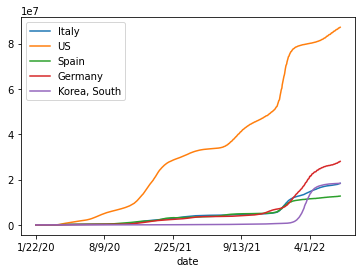

In [102]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data type Date

df_plot.head()

In [103]:
df_plot.date[0]

'1/22/20'

In [104]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [105]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [106]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [107]:
df_plot.to_csv(r"F:\EDS\eds_covid-19\data\processed\COVID_small_flat_table.csv",sep=';',index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [108]:
data_path=r"F:\EDS\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181666,181725,181808,181912,181987,182033,182072,182149,182228,182324
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277409,277444,277663,277940,278211,278504,278793,279077,279077,279167
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265975,265985,265993,266006,266015,266025,266030,266038,266049,266062
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,101320


In [109]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [110]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,181666,181725,181808,181912,181987,182033,182072,182149,182228,182324
1,no,Albania,0,0,0,0,0,0,0,0,...,277409,277444,277663,277940,278211,278504,278793,279077,279077,279167
2,no,Algeria,0,0,0,0,0,0,0,0,...,265975,265985,265993,266006,266015,266025,266030,266038,266049,266062
3,no,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43774,43774,43774,43774,43774,43774,43774
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,101320


In [111]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [112]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [113]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [114]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv(r"F:\EDS_new\EDS-Covid-19-Project-\EDS\eds_covid-19\data\processed\processed\COVID_relational_confirmed.csv",sep=';',index=False)

In [115]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

             date state country  confirmed
252210 2022-06-24    no      US   86909476
252495 2022-06-25    no      US   86948848
252780 2022-06-26    no      US   86967399
253065 2022-06-27    no      US   87092233
253350 2022-06-28    no      US   87217673


# Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [116]:
data_path=r"F:\EDS\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_US.csv"
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16211,16279,16313,16330,16360,16400,16400,16400,16468,16496
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57726,57887,58009,58169,58293,58372,58372,58372,58595,58695
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5782,5795,5813,5818,5825,5832,5832,5832,5857,5863
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6611,6621,6630,6648,6654,6663,6663,6663,6679,6687
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15207,15222,15246,15249,15272,15283,15283,15283,15324,15335


In [117]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [118]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


# update the large relational file

In [119]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [120]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [121]:
pd_relational_model_all.to_csv(r"F:\EDS_new\EDS-Covid-19-Project-\EDS\eds_covid-19\data\processed\processed\20200424_COVID_relational_confirmed.csv",sep=';',index=False)

In [122]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

              date    state country  confirmed
252476  2020-01-22  Alabama      US          0
252477  2020-01-22  Alabama      US          0
252478  2020-01-22  Alabama      US          0
252479  2020-01-22  Alabama      US          0
252480  2020-01-22  Alabama      US          0
...            ...      ...     ...        ...
3223509 2022-06-28  Wyoming      US      10807
3223510 2022-06-28  Wyoming      US       5815
3223511 2022-06-28  Wyoming      US          0
3223512 2022-06-28  Wyoming      US       2482
3223513 2022-06-28  Wyoming      US       1643

[2971038 rows x 4 columns]


# cross check on full sum US data

In [123]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [124]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
...,...,...
2022-06-24,US,86909476
2022-06-25,US,86948848
2022-06-26,US,86967399
